In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy

f = open('./benchmark_data/quantum_plotter_input_sametotal.p', 'rb' )
benchmarks = pickle.load(f)
print(benchmarks.keys())

dict_keys([(3, 4), (3, 6), (4, 6), (4, 8), (4, 9), (5, 6), (5, 8), (5, 9), (6, 8), (6, 9)])


dict_keys(['num_shots', 'circ', 'evaluations', 'searcher_time', 'classical_time', 'quantum_time', 'uniter_time'])
22.880140900471766


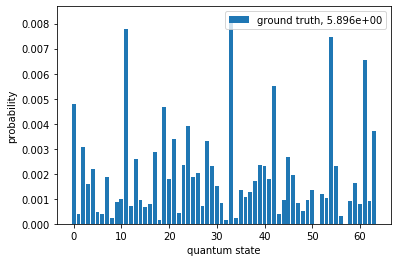

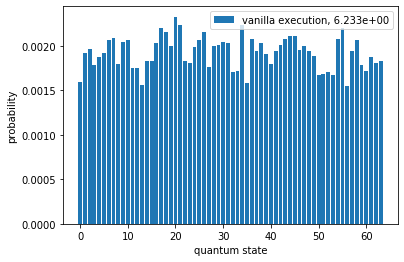

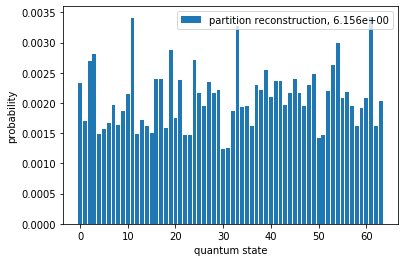

In [33]:
case = (6,9)
benchmark = benchmarks[case]
print(benchmark.keys())
evaluations = benchmark['evaluations']
circ = benchmark['circ']
d1 = evaluations['sv_noiseless']
d2 = evaluations['qasm']
d3 = evaluations['qasm+noise']
d4 = evaluations['qasm+noise+cutting']

reduction = 100*(cross_entropy(d1,d3)-cross_entropy(d1,d4))/(cross_entropy(d1,d3)-cross_entropy(d1,d1))
print(reduction)

plot_range = min(64,len(d1))
x = np.arange(len(d1))[:plot_range]

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('ground_truth_eg.png')

plt.figure()
plt.bar(x,height=d3[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d3))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('vanilla_execution_eg.png')

plt.figure()
plt.bar(x,height=d4[:plot_range],label='partition reconstruction, %.3e'%cross_entropy(d1,d4))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('partition_reconstruction_eg.png')

# plt.figure(figsize=(15,5))
# plt.subplot(131)
# plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
# plt.xlabel('quantum state')
# plt.ylabel('probability')
# plt.legend()
# # plt.subplot(222)
# # plt.bar(x,height=d2[:plot_range],label='qasm, %.3e'%cross_entropy(d1,d2))
# # plt.legend()
# plt.subplot(132)
# plt.bar(x,height=d3[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d3))
# plt.xlabel('quantum state')
# plt.legend()
# plt.subplot(133)
# plt.bar(x,height=d4[:plot_range],label='partition reconstruction, %.3e'%cross_entropy(d1,d4))
# plt.xlabel('quantum state')
# plt.legend()
# plt.suptitle('%d-qubit supremacy circuit example, reduction = %.2f%%'%(len(circ.qubits),reduction))
# plt.savefig('ce_reduction_eg.png')